In [ ]:
import tensorflow
#Regression me output humesha scalar hota hai continous value hoti hai
#13 columns maojood hai boston housing me
#har column ki range fixed nae hai, value har column ki alag hai
#normalization k through 0 or 1 k dermiyaan leakey ayngye x-mean/standarrd deviation

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() #ismey 506 records majood hai

 8192/57026 [===>..........................] - ETA: 0s

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape #404 records

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets.shape #train labels ka shape

(404,)

In [ ]:
test_targets.shape #test labels ka shape

(102,)

In [ ]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
train_targets[0] #15k dollar ka hai ye ghar or uskey attributes upper hai

15.2

In [ ]:
mean = train_data.mean(axis = 0) #Normalization process
                                  #mean hum srf training data set ka nikla or std bhi training ka nikala or same ye dono test me bhi use krliye

In [ ]:
train_data -= mean

In [ ]:
std = train_data.std(axis=0)

In [ ]:
train_data /= std

In [ ]:
train_data[0] #ab sb values 0 and 1 k darmiyaan agai hai

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [ ]:
test_data -= mean

In [ ]:
test_data /= std

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model(): #humney function bnaya takey har 'k' iteration pr wo trian krey
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],))) #13 input jayngye, shape se tuple return hua,no of coulmns 13
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1)) #q k regression provblem hai issliye last layer pr koi activation function nae lagyengye
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
  return model                                                    #regression me 'MSE' ka loss function nikltey hai, yahn pr accuarcy nae hoti o hum
                                                                  #matrice 'MAE' nikltey mean absolute  error (+- sign hata key)

In [ ]:
#q k humarey pass data kaam hai or hum training data ko tor k validation me lagungi to wo or kaam hoajyega
#issliye hum k-fold validation krengye
#k ki value jo btaungi, wo training dataset ko unmey divide krdeyga..
#10 iteration chalengi jinmey se ek ek kr ke wo har set ko validation bn kr train kreyga..
#har iteration ka loss nikal k mean nikal k accuracy nikaltey hai

In [ ]:
len(train_data)

404

In [ ]:
len(train_data)//4

101

In [ ]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = [] #score
all_mae_histories = [] #history---har training me 100 epochs chalengey jo 2d array bnayega 

In [ ]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] #formula
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)

  model = build_model()

  history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0) #jab training chalrhi hoti hai to wo training data se relted info show keta hai agar 0 krdun to nae kreyga
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)

  model = build_model()

  history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)

  mae_history = history.history['val_mean_absolute_error']

  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
np.mean(all_scores)

2.4244876

In [ ]:
all_scores

[2.430688, 2.480729, 2.5226038, 2.263929]

In [ ]:
print("All fold validatoion error: ",all_scores)
print("Mean of all fold validation error: ",np.mean(all_scores))
print("Average MAE History: ", average_mae_history)

All fold validatoion error:  [2.430688, 2.480729, 2.5226038, 2.263929]
Mean of all fold validation error:  2.4244876
Average MAE History:  [4.1897564, 3.3643274, 3.1131077, 2.9418697, 2.876362, 2.821814, 2.7507973, 2.5362573, 2.6310186, 2.589554, 2.6198032, 2.622902, 2.4806733, 2.5379465, 2.4792066, 2.535831, 2.3807933, 2.3810618, 2.446702, 2.4977841, 2.5042071, 2.4527452, 2.3657203, 2.3939219, 2.3632205, 2.3056378, 2.5145152, 2.3830447, 2.3603356, 2.4248524, 2.424888, 2.3952363, 2.3676257, 2.3052175, 2.3371415, 2.3242989, 2.353797, 2.2421384, 2.3784194, 2.3048983, 2.511272, 2.2963786, 2.2978668, 2.311121, 2.2886705, 2.339871, 2.3794231, 2.2924838, 2.2840984, 2.2719545, 2.2912836, 2.3362508, 2.2436566, 2.3740973, 2.3087335, 2.2995262, 2.3399541, 2.3030381, 2.3334308, 2.489517, 2.2230742, 2.3848538, 2.3490615, 2.3829956, 2.3604372, 2.2556162, 2.230363, 2.3719783, 2.34655, 2.4059594, 2.3591578, 2.298909, 2.3383627, 2.2607825, 2.2209492, 2.377853, 2.4597878, 2.4670205, 2.4555383, 2.446765

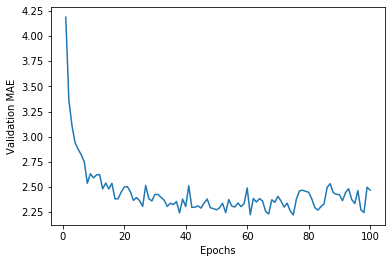

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

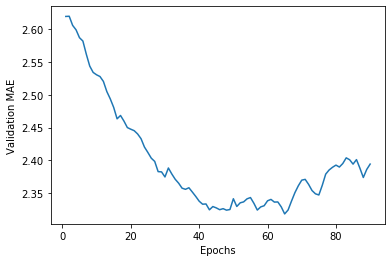

In [ ]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()

model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 3ms/sample - loss: 5406.1052 - mean_absolute_error: 73.3456


In [ ]:
test_mae_score

73.34565

In [ ]:
test_mse_score

5406.105152803309